<a href="https://colab.research.google.com/github/ceelkamalayko/API201DFinalExercise/blob/main/Final_Exercise_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load packages

In [106]:
# Requisite package installations

install.packages('formattable')
install.packages('reshape2')
install.packages('wesanderson')
install.packages('ggthemes')
install.packages("tidyverse")
library(tidyverse)
library(ggthemes)
library(tidyr)
library(ggplot2)
library(dplyr)
library(formattable)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("reshape2"):
“installation of package ‘reshape2’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("ggthemes"):
“installation of package ‘ggthemes’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [107]:
# Color palettes packages
install.packages("ggthemes")
library(ggthemes)

# Wesanderson colors, from http://www.sthda.com/english/wiki/colors-in-r
install.packages("wesanderson")
library(wesanderson)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# 1. Analysis of political polarization

## 1.1 Data cleaning

In [108]:
# This is the URL that will lead you to where the datafile lives on GitHub
url <- "https://raw.githubusercontent.com/ceelkamalayko/API201DFinalExercise/main/GSSdata.csv"
data <- read.csv(url)

# To avoid recurring errors, we update column names
colnames(data) <- c("Spectrum", "Label", "1974", "1975", "1976", "1977", "1978", "1980", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1993", "1994", "1996", "1998", "2000", "2002", "2004", "2006", "2008", "2010", "2012", "2014", "2016", "2018", "2021", "2022")

# IMPORTANT: I (Lucas) reversed the order between cleaning and filtering for specific years, that way the data is cleaned before it is subsetted and we can subset it differently later

# We need to filter so that we can focus on 1 to 7 as opposed to -99 which is irrelevant for our research

cleaned_data <- data[data$Spectrum %in% c(1, 2, 3, 4, 5, 6, 7), ]

# print the clean data
print(cleaned_data)




   Spectrum                        Label 1974 1975 1976 1977 1978 1980 1982
5         1            Extremely liberal   22   46   31   37   22   36   48
6         2                      Liberal  201  179  187  169  142  121  199
7         3             Slightly liberal  207  196  186  214  241  208  267
8         4 Moderate, middle of the road  564  559  559  564  549  582  694
9         5        Slightly conservative  221  232  221  251  263  258  235
10        6                 Conservative  160  150  190  179  188  180  229
11        7       Extremely conservative   35   35   27   39   30   44   67
   1983 1984 1985 1986 1987 1988 1989 1990 1991 1993 1994 1996 1998 2000 2002
5    16   29   35   25   47   34   40   36   37   30   71   59   64  107   47
6    67  133  163  132  234  176  178  141  154  180  328  303  357  308  143
7    98  177  171  176  226  189  191  179  214  203  378  334  351  285  159
8   319  568  566  579  641  514  566  476  584  575 1049 1045  986 1054  522
9 

## 1.2. Polarization in 1974 vs 2022

### 1.2.1. Histogram polarization 1974 vs 2022

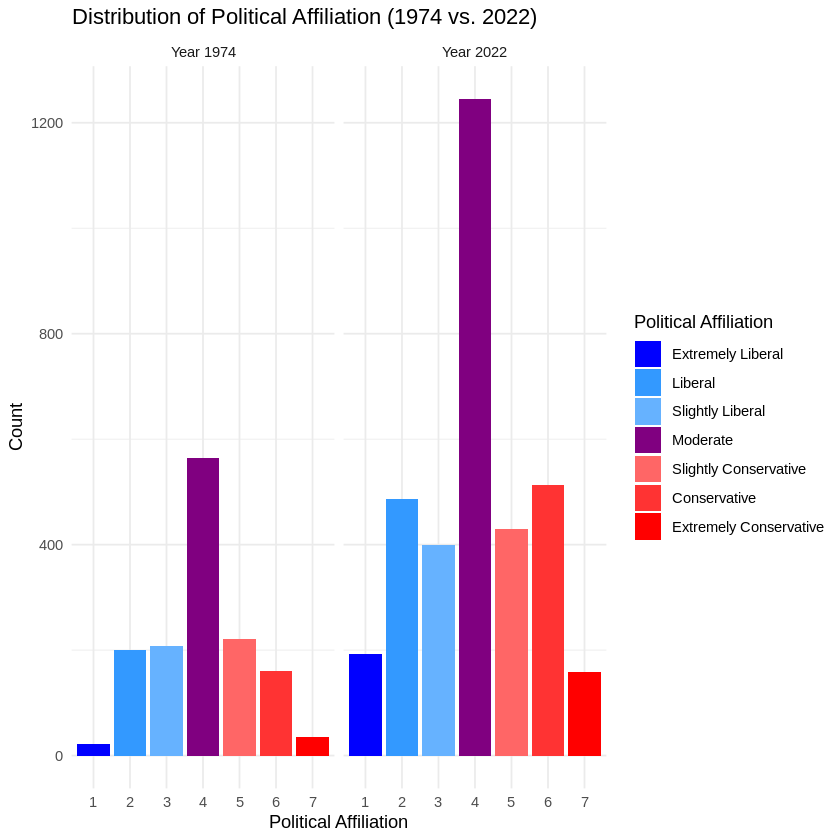

In [109]:
# Let us now subset the data for 1974 and 2022 so that we can focus on 1974 and 2022

filteredata <- cleaned_data[, c("Spectrum", "Label", "1974", "2022")]

# To plot readily, we pivot the data
ready_data <- pivot_longer(filteredata, cols = c("1974", "2022"), names_to = "Year", values_to = "Count")

# Generating Histograms
ggplot(ready_data, aes(x = factor(Spectrum), y = Count, fill = factor(Spectrum))) +
  geom_bar(position = "dodge", stat = "identity") +
  facet_wrap(~ Year, scales = "free_x", labeller = labeller(Year = c("1974" = "Year 1974", "2022" = "Year 2022"))) +
  labs(title = "Distribution of Political Affiliation (1974 vs. 2022)",
       x = "Political Affiliation",
       y = "Count") +
  scale_x_discrete(labels = c("1", "2", "3", "4", "5", "6", "7")) +
  scale_fill_manual(values = c("1" = "#0000FF", "2" = "#3399FF", "3" = "#66B2FF", "4" = "#800080", "5" = "#FF6666", "6" = "#FF3333", "7" = "#FF0000"),
                    name = "Political Affiliation",
                    labels = c("1" = "Extremely Liberal", "2" = "Liberal", "3" = "Slightly Liberal",
                               "4" = "Moderate", "5" = "Slightly Conservative", "6" = "Conservative",
                               "7" = "Extremely Conservative")) +
  theme_minimal()

### 1.2.2. Stacked bar chart polarization 1974 vs 2022

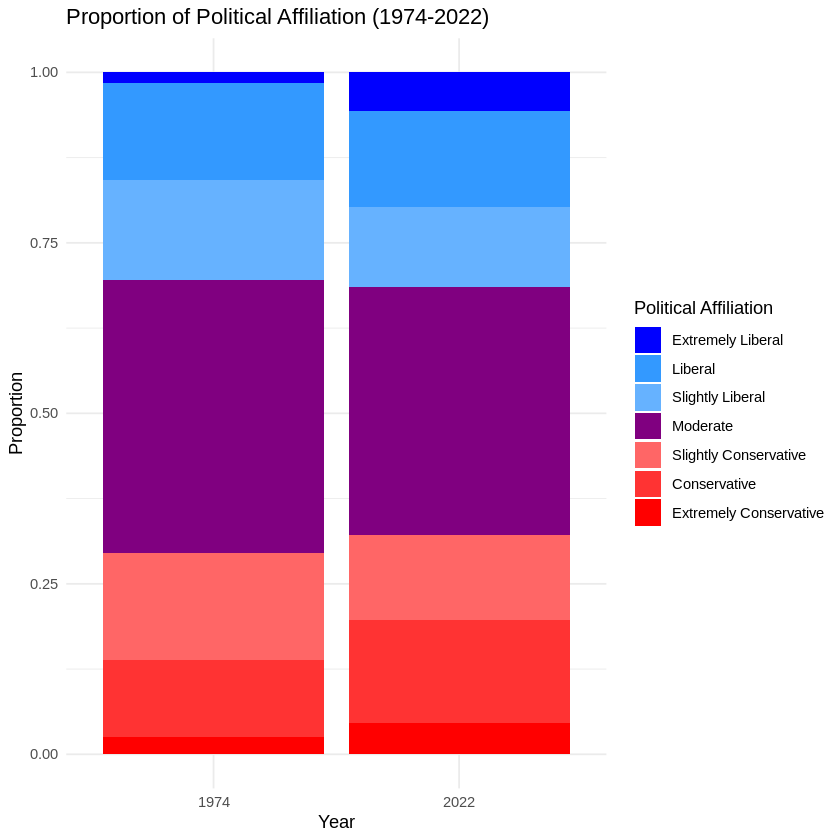

In [110]:
# Determining the proportion in each year after grouping
ready_data <- ready_data %>%
  group_by(Year) %>%
  mutate(Proportion = Count / sum(Count))

# Stacked Bar Chart
ggplot(ready_data, aes(x = factor(Year), y = Proportion, fill = factor(Spectrum))) +
  geom_bar(position = "stack", stat = "identity") +
  labs(title = "Proportion of Political Affiliation (1974-2022)",
       x = "Year",
       y = "Proportion") +
  scale_fill_manual(values = c("1" = "#0000FF", "2" = "#3399FF", "3" = "#66B2FF", "4" = "#800080", "5" = "#FF6666", "6" = "#FF3333", "7" = "#FF0000"),
                    name = "Political Affiliation",
                    labels = c("1" = "Extremely Liberal", "2" = "Liberal", "3" = "Slightly Liberal",
                               "4" = "Moderate", "5" = "Slightly Conservative", "6" = "Conservative",
                               "7" = "Extremely Conservative")) +
  theme_minimal()

### 1.2.3. Line graph of proportion of extremes

In [111]:
# Adding rows to track the evolution of the proportion over time

# Adding a total row

dfpolarizationfinal <- cleaned_data %>%
  bind_rows(summarise(., across(where(is.numeric), sum), across(where(is.character), ~'Total')))

# Adding blank rows for the proportions of extreme and near-extreme

new_row <- dfpolarizationfinal[1,]
new_row[] <- NA
new_row$Label <- "propextr"
dfpolarizationfinal <- rbind(dfpolarizationfinal , new_row)

new_row <- dfpolarizationfinal[1,]
new_row[] <- NA
new_row$Label <- "propnearextr"
dfpolarizationfinal <- rbind(dfpolarizationfinal , new_row)

# Computing the values for these new rows

dfpolarizationfinal[9,-2] <- ( dfpolarizationfinal[1,-2] + dfpolarizationfinal[7,-2] ) / dfpolarizationfinal[8,-2]
dfpolarizationfinal[10,-2] <- ( dfpolarizationfinal[1,-2] + dfpolarizationfinal[2,-2] + dfpolarizationfinal[6,-2] + dfpolarizationfinal[7,-2] )/ dfpolarizationfinal[8,-2]

dfpolarizationfinal


Spectrum,Label,1974,1975,1976,1977,1978,1980,1982,1983,⋯,2004,2006,2008,2010,2012,2014,2016,2018,2021,2022
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.0000000,Extremely liberal,2.200000e+01,4.600000e+01,31.0000000,3.700000e+01,2.200000e+01,3.600000e+01,4.800000e+01,16.00000000,⋯,4.600000e+01,1.390000e+02,6.900000e+01,7.600000e+01,8.100000e+01,9.400000e+01,1.360000e+02,1.220000e+02,2.070000e+02,192.0000000
2.0000000,Liberal,2.010000e+02,1.790000e+02,187.0000000,1.690000e+02,1.420000e+02,1.210000e+02,1.990000e+02,67.00000000,⋯,1.200000e+02,5.240000e+02,2.400000e+02,2.590000e+02,2.440000e+02,3.040000e+02,3.500000e+02,2.780000e+02,6.230000e+02,486.0000000
3.0000000,Slightly liberal,2.070000e+02,1.960000e+02,186.0000000,2.140000e+02,2.410000e+02,2.080000e+02,2.670000e+02,98.00000000,⋯,1.530000e+02,5.170000e+02,2.210000e+02,2.320000e+02,2.080000e+02,2.630000e+02,3.100000e+02,2.560000e+02,4.900000e+02,400.0000000
4.0000000,"Moderate, middle of the road",5.640000e+02,5.590000e+02,559.0000000,5.640000e+02,5.490000e+02,5.820000e+02,6.940000e+02,319.00000000,⋯,4.970000e+02,1.683000e+03,7.400000e+02,7.460000e+02,7.130000e+02,9.890000e+02,1.032000e+03,8.550000e+02,1.377000e+03,1245.0000000
5.0000000,Slightly conservative,2.210000e+02,2.320000e+02,221.0000000,2.510000e+02,2.630000e+02,2.580000e+02,2.350000e+02,142.00000000,⋯,2.140000e+02,6.180000e+02,2.680000e+02,2.650000e+02,2.680000e+02,3.340000e+02,3.820000e+02,2.830000e+02,4.760000e+02,430.0000000
6.0000000,Conservative,1.600000e+02,1.500000e+02,190.0000000,1.790000e+02,1.880000e+02,1.800000e+02,2.290000e+02,108.00000000,⋯,2.230000e+02,6.850000e+02,3.270000e+02,3.150000e+02,2.920000e+02,3.580000e+02,4.260000e+02,3.540000e+02,6.170000e+02,514.0000000
7.0000000,Extremely conservative,3.500000e+01,3.500000e+01,27.0000000,3.900000e+01,3.000000e+01,4.400000e+01,6.700000e+01,20.00000000,⋯,5.600000e+01,1.670000e+02,6.800000e+01,8.000000e+01,6.800000e+01,1.070000e+02,1.200000e+02,9.900000e+01,1.740000e+02,159.0000000
28.0000000,Total,1.410000e+03,1.397000e+03,1401.0000000,1.453000e+03,1.435000e+03,1.429000e+03,1.739000e+03,770.00000000,⋯,1.309000e+03,4.333000e+03,1.933000e+03,1.973000e+03,1.874000e+03,2.449000e+03,2.756000e+03,2.247000e+03,3.964000e+03,3426.0000000
0.2857143,propextr,4.042553e-02,5.798139e-02,0.0413990,5.230557e-02,3.623693e-02,5.598321e-02,6.612996e-02,0.04675325,⋯,7.792208e-02,7.062082e-02,7.087429e-02,7.906741e-02,7.950907e-02,8.207432e-02,9.288824e-02,9.835336e-02,9.611504e-02,0.1024518


@Yussuf we can make the graph below nicer by adjusting axes, legend etc.

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”


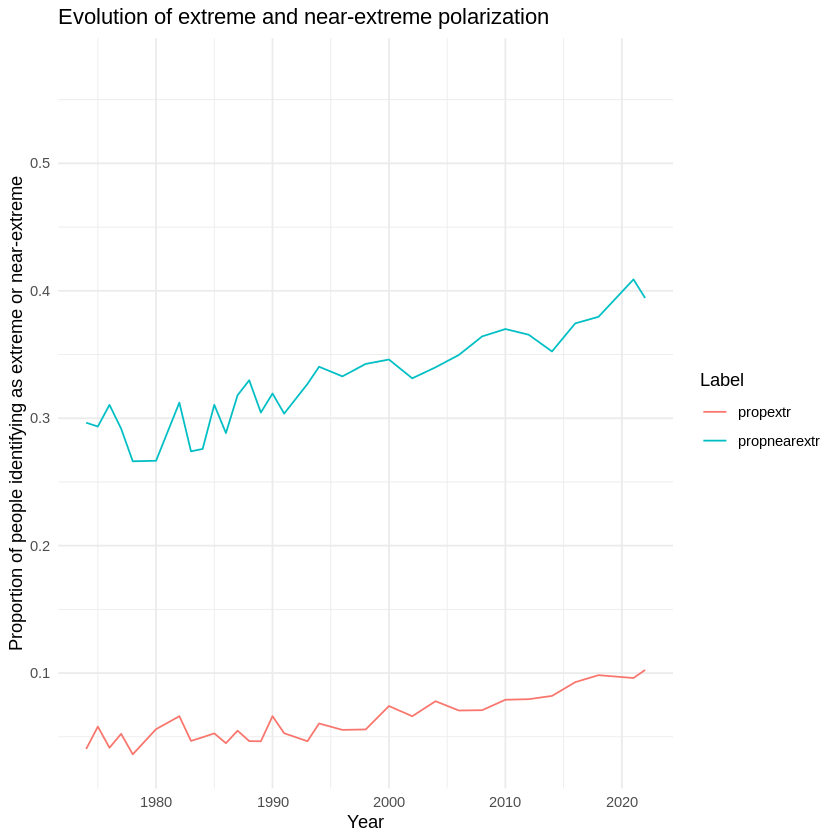

In [112]:
# Grouping variables to be able to show several lines

linegraph <- dfpolarizationfinal %>%
  filter(Label == "propextr" | Label == "propnearextr") %>%
  pivot_longer(,cols = -2, names_to = "Year", values_to = "Proportion")
#  linegraph

linegraph$Year <- as.numeric(as.character(linegraph$Year))

# Plotting graph
linegraph %>%
  ggplot(aes(x=Year , y = Proportion, group = Label , color = Label)) +
  geom_line() +
  labs(title = "Evolution of extreme and near-extreme polarization", x = "Year",
        y = "Proportion of people identifying as extreme or near-extreme", fill= "Type of digital media") +
  theme_minimal()


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”


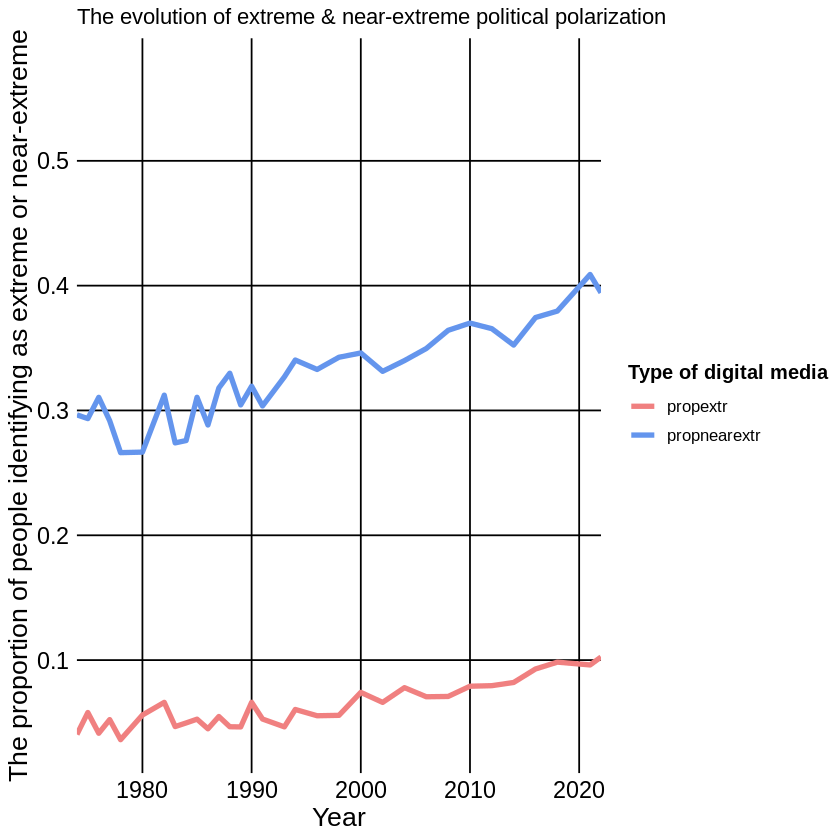

In [113]:



# linegraph variablef filters for dataset
linegraph <- dfpolarizationfinal %>%
  filter(Label == "propextr" | Label == "propnearextr") %>%
  pivot_longer(, cols = -2, names_to = "Year", values_to = "Proportion")

linegraph$Year <- as.numeric(as.character(linegraph$Year))

# Plotting graph with enhanced aesthetics
thegraph <- ggplot(linegraph, aes(x = Year, y = Proportion, group = Label, color = Label)) +
  geom_line(size = 1.5, linetype = "solid") +
  labs(title = "The evolution of extreme & near-extreme political polarization",
       x = "Year",
       y = "The proportion of people identifying as extreme or near-extreme",
       color = "Type of digital media") +
  scale_x_continuous(expand = c(0, 0)) +
  scale_color_manual(values = c("propextr" = "#F08080", "propnearextr" = "#6495ED")) +
  theme_minimal()
#Adjusting the legends and axis to make them more visually appealing
  thegraph <- thegraph + theme(legend.position = "right",
        legend.title = element_text(size = 12, face = "bold"),
        legend.text = element_text(size = 10),
        axis.text.x = element_text(color = "black", size = 14),
        axis.text.y = element_text(color = "black", size = 14),
        axis.title.x = element_text(color = "black", size = 16),
        axis.title.y = element_text(color = "black", size = 16),
        panel.grid.major = element_line(color = "black", linetype = "solid"),
        panel.grid.minor = element_blank())
    #Displaying the graph
    thegraph



### 1.2.4. Difference in proportions of extremes and near extremes, 1974 vs 2022 & 2006 vs 2018

In [114]:
# This is the difference between 1974 and 2022 for extremes - below for the same between 2006 and 2018

# Proportion of extremes
pextreme1974 <- dfpolarizationfinal[dfpolarizationfinal$Label == "propextr",'1974']
pextreme1974
pextreme2022 <- dfpolarizationfinal[dfpolarizationfinal$Label == "propextr",'2022']
pextreme2022

# Effect size & standard error
diffextreme <- abs(pextreme1974-pextreme2022)
SEextreme <- sqrt(pextreme1974*(1-pextreme1974)/1410 + pextreme2022*(1-pextreme2022)/3426)
print(paste("For 1974-2022, Effect size is of",diffextreme))
print(paste("For 1974-2022, Standard error is of",SEextreme))

# Confidence interval

lowCI <- diffextreme - 2*SEextreme
highCI <- diffextreme + 2*SEextreme
print(paste("Lower bound of confidence interval is of",lowCI))
print(paste("Higher bound of confidence interval is of",highCI))

# Z score & P value
zscore <- diffextreme/SEextreme
print(paste("Z score is of",zscore))
pvalue <- 2*pnorm(-zscore)
print(paste("Pvalue is of ",pvalue))


[1] 0.04042553

[1] 0.1024518

[1] "For 1974-2022, Effect size is of 0.0620263069642658"
[1] "For 1974-2022, Standard error is of 0.00737238352867483"
[1] "Lower bound of confidence interval is of 0.0472815399069161"
[1] "Higher bound of confidence interval is of 0.0767710740216154"
[1] "Z score is of 8.41333155322358"
[1] "Pvalue is of  3.98526427191653e-17"


In [115]:
# We are looking at 2006 & 2018 (extremes only) in order to compare with the social media dataset timeframe, which spans from 2005 to 2019 (there are no records for 2005 and 2019 in the polarization dataset, so this is the closest)

# Proportion of extremes
pextreme2006 <- dfpolarizationfinal[dfpolarizationfinal$Label == "propextr",'2006']
pextreme2006
pextreme2018 <- dfpolarizationfinal[dfpolarizationfinal$Label == "propextr",'2018']
pextreme2018

# Effect size & standard error
diffextreme <- abs(pextreme2006-pextreme2018)
SEextreme <- sqrt(pextreme2006*(1-pextreme2006)/1410 + pextreme2018*(1-pextreme2018)/3426)
print(paste("Effect size is of",diffextreme))
print(paste("Standard error is of",SEextreme))

# Confidence interval

lowCI <- diffextreme - 2*SEextreme
highCI <- diffextreme + 2*SEextreme
print(paste("Lower bound of confidence interval is of",lowCI))
print(paste("Higher bound of confidence interval is of",highCI))

# Z score & P value
zscore <- diffextreme/SEextreme
print(paste("Z score is of",zscore))
pvalue <- 2*pnorm(-zscore)
print(paste("Pvalue is of ",pvalue))


[1] 0.07062082

[1] 0.09835336

[1] "Effect size is of 0.027732543049681"
[1] "Standard error is of 0.00851075791196855"
[1] "Lower bound of confidence interval is of 0.0107110272257439"
[1] "Higher bound of confidence interval is of 0.0447540588736181"
[1] "Z score is of 3.25852801084627"
[1] "Pvalue is of  0.00111991819887282"


In [116]:
# This is the difference between 1974 and 2022 for extremes AND near extremes - below for the same between 2006 and 2018

# Proportion of extremes and near extremes
pextreme1974 <- dfpolarizationfinal[dfpolarizationfinal$Label == "propnearextr",'1974']
pextreme1974
pextreme2022 <- dfpolarizationfinal[dfpolarizationfinal$Label == "propnearextr",'2022']
pextreme2022

# Effect size & standard error
diffextreme <- abs(pextreme1974-pextreme2022)
SEextreme <- sqrt(pextreme1974*(1-pextreme1974)/1410 + pextreme2022*(1-pextreme2022)/3426)
print(paste("Effect size is of",diffextreme))
print(paste("Standard error is of",SEextreme))

# Confidence interval

lowCI <- diffextreme - 2*SEextreme
highCI <- diffextreme + 2*SEextreme
print(paste("Lower bound of confidence interval is of",lowCI))
print(paste("Higher bound of confidence interval is of",highCI))

# Z score & P value
zscore <- diffextreme/SEextreme
print(paste("Z score is of",zscore))
pvalue <- 2*pnorm(-zscore)
print(paste("Pvalue is of ",pvalue))

[1] 0.2964539

[1] 0.3943374

[1] "Effect size is of 0.0978835190222454"
[1] "Standard error is of 0.0147524195075699"
[1] "Lower bound of confidence interval is of 0.0683786800071055"
[1] "Higher bound of confidence interval is of 0.127388358037385"
[1] "Z score is of 6.63508239933241"
[1] "Pvalue is of  3.24321308049928e-11"


In [117]:
# We are looking at 2006 & 2018 (extremes AND near extremes) in order to compare with the social media dataset timeframe, which spans from 2005 to 2019 (there are no records for 2005 and 2019 in the polarization dataset, so this is the closest)

# Proportion of extremes AND near extremes
pextreme2006 <- dfpolarizationfinal[dfpolarizationfinal$Label == "propnearextr",'2006']
pextreme2006
pextreme2018 <- dfpolarizationfinal[dfpolarizationfinal$Label == "propnearextr",'2018']
pextreme2018

# Effect size & standard error
diffextreme <- abs(pextreme2006-pextreme2018)
SEextreme <- sqrt(pextreme2006*(1-pextreme2006)/1410 + pextreme2018*(1-pextreme2018)/3426)
print(paste("Effect size is of",diffextreme))
print(paste("Standard error is of",SEextreme))

# Confidence interval

lowCI <- diffextreme - 2*SEextreme
highCI <- diffextreme + 2*SEextreme
print(paste("Lower bound of confidence interval is of",lowCI))
print(paste("Higher bound of confidence interval is of",highCI))

# Z score & P value
zscore <- diffextreme/SEextreme
print(paste("Z score is of",zscore))
pvalue <- 2*pnorm(-zscore)
print(paste("Pvalue is of ",pvalue))


[1] 0.3496423

[1] 0.3796173

[1] "Effect size is of 0.0299749872923367"
[1] "Standard error is of 0.0151661697564567"
[1] "Lower bound of confidence interval is of -0.000357352220576833"
[1] "Higher bound of confidence interval is of 0.0603073268052502"
[1] "Z score is of 1.97643754314271"
[1] "Pvalue is of  0.0481052429864934"


#### Summary table of difference in proportions (WIP)
@Yussuf

This would be great to have! Basically just a compilation of the numbers computed in previous code cells: difference in proportions, standard error, confidence intervals, z score and p value for each of the 4 combinations:
*   1974 vs 2022 Extreme only
*   1974 vs 2022 Extreme and near extreme
*   2004 vs 2018 Extreme only
*   2004 vs 2018 Extreme and near extreme

In [118]:

print('A Recap Table on the Difference in Proportions')
# dataframe with the proportions data to be recapped
proportions_data <- data.frame(
  Comparison = c('1974 vs 2022 Extreme only', '1974 vs 2022 Extreme and near extreme', '2006 vs 2018 Extreme only', '2006 vs 2018 Extreme and near extreme'),
  Effect_Size = c(0.062, 0.098, 0.028, 0.030),
  Standard_Error = c(0.007, 0.015, 0.009, 0.015),
  Lower_CI_Bound = c(0.047, 0.068, 0.011, -0.0004),
  Upper_CI_Bound = c(0.077, 0.127, 0.045, 0.060),
  Z_Score = c(8.413, 6.635, 3.259, 1.976),
  P_Value = c(3.985e-17, 3.243e-11, 0.00112, 0.0481)
)

# Formatting number-based columns for better visualization
data_formatted_table <- formattable(proportions_data, align = c("l", "r", "r", "r", "r", "r", "r"), list(
  `Effect Size` = color_tile("white", "blue", proportions_data$Effect_Size),
  `Standard Error` = color_tile("white", "blue", proportions_data$Standard_Error),
  `Lower CI Bound` = color_tile("white", "blue", proportions_data$Lower_CI_Bound),
  `Upper CI Bound` = color_tile("white", "blue", proportions_data$Upper_CI_Bound),
  `Z Score` = color_tile("white", "red", proportions_data$Z_Score),
  `P Value` = color_tile("white", "red", proportions_data$P_Value)
))

# Making the column names more readable
col_names <- c('Comparison', 'Effect Size', 'Standard Error', 'Lower CI Bound', 'Upper CI Bound', 'Z Score', 'P-value')
colnames(data_formatted_table) <- col_names

# Showing the table
data_formatted_table


[1] "A Recap Table on the Difference in Proportions"


Comparison,Effect Size,Standard Error,Lower CI Bound,Upper CI Bound,Z Score,P-value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1974 vs 2022 Extreme only,0.062,0.007,0.0470,0.077,8.413,3.985e-17
1974 vs 2022 Extreme and near extreme,0.098,0.015,0.0680,0.127,6.635,3.243e-11
2006 vs 2018 Extreme only,0.028,0.009,0.0110,0.045,3.259,1.120e-03
2006 vs 2018 Extreme and near extreme,0.030,0.015,-0.0004,0.060,1.976,4.810e-02


### *Political affiliation dataset (TBD if will be included)*

In [119]:
df_partyidentification <- read.csv('https://raw.githubusercontent.com/LucasLMS9/API201DFinalExercise/main/Party%20identification%20among%20registered%20voters%201994-2019%20(Detailed%20Tables)%20-%20White%2C%20non-Hispanic.csv')
head(df_partyidentification)

,Among.white.registered.voters,X,X.1,X.2,X.3,X.4,X.5
,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>
1,,,,,NA,,
2,,% who identify as ...,,,NA,% who identify as/lean toward ...,
3,Year,Republican,Democrat,Independent,NA,Rep/Lean Rep,Dem/Lean Dem
4,1994,36,29,31,NA,51,39
5,1995,36,29,31,NA,52,41
6,1996,36,30,30,NA,49,44


# 2. Analysis of social media usage

## 2.1. Data cleaning

In [120]:
df_techusage <- read.csv('https://raw.githubusercontent.com/LucasLMS9/API201DFinalExercise/main/technology-adoption-by-households-in-the-united-states%20(1).csv')
head(df_techusage)

,Entity,Code,Year,Technology.Diffusion..Comin.and.Hobijn..2004..and.others.
,<chr>,<lgl>,<int>,<dbl>
1,Amazon Prime users,NA,2014,11.13
2,Amazon Prime users,NA,2015,17.09
3,Amazon Prime users,NA,2016,24.58
4,Amazon Prime users,NA,2017,32.51
5,Amazon Prime users,NA,2018,36.58
6,Automatic transmission,NA,1910,0.00


In [121]:
#Rename variables in df_techusage

colnames(df_techusage)[colnames(df_techusage) == "Technology.Diffusion..Comin.and.Hobijn..2004..and.others."] <- "Usage"
head(df_techusage)


,Entity,Code,Year,Usage
,<chr>,<lgl>,<int>,<dbl>
1,Amazon Prime users,NA,2014,11.13
2,Amazon Prime users,NA,2015,17.09
3,Amazon Prime users,NA,2016,24.58
4,Amazon Prime users,NA,2017,32.51
5,Amazon Prime users,NA,2018,36.58
6,Automatic transmission,NA,1910,0.00


## 2.2. Line chart of social media usage

@Yussuf we can also make this graph slightly cleaner, with colour scheme and more detailed description of 'usage'

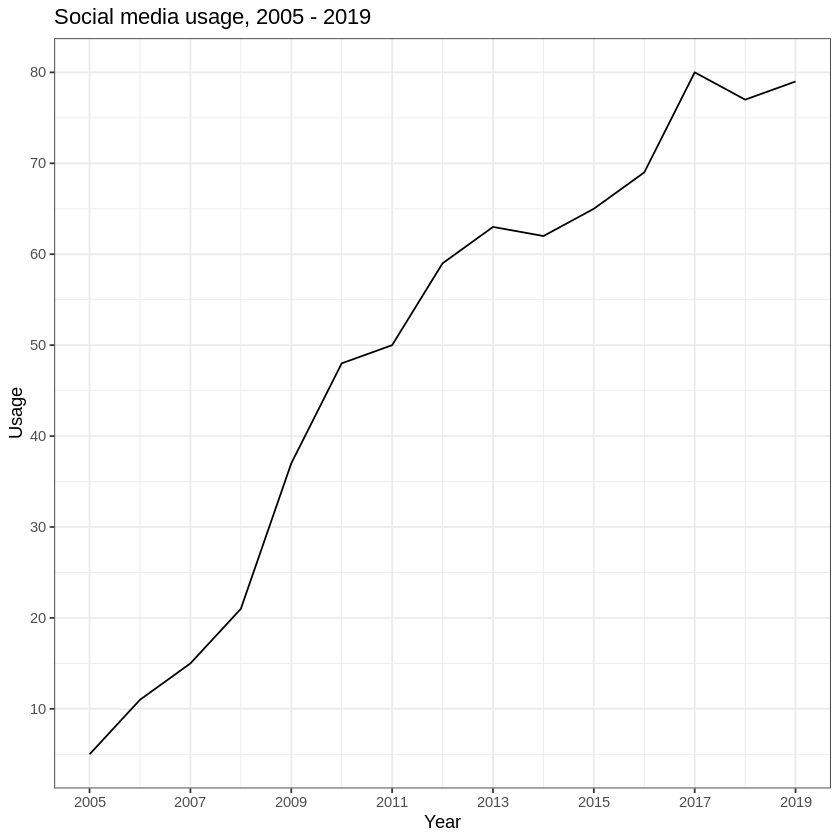

In [122]:
#Line chart of social media usage (Isabel's chart for P-Set 10)

df_techusage <- df_techusage %>%
  filter(Entity == "Social media usage")

df_techusage %>%
  ggplot(aes(x = Year, y = Usage)) +
  geom_line() +
    labs(title = "Social media usage, 2005 - 2019") +
    scale_y_continuous(breaks = c(0,10,20,30,40,50,60,70,80,90,100)) +
      scale_x_continuous(breaks = c(2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019)) +
      theme_bw()


## 2.3. Daily hours spent with digital media

In [123]:
# Importing dataset

socialmediahours <- read.csv("https://raw.githubusercontent.com/LucasLMS9/API201DFinalExercise/main/daily-hours-spent-with-digital-media-per-adult-user.csv")
head(socialmediahours)


,Entity,Code,Year,Mobile..BOND.Internet.Trends..2019..,Desktop.Laptop..BOND.Internet.Trends..2019..,Other.Connected.Devices..BOND.Internet.Trends..2019..
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,United States,USA,2008,0.3,2.2,0.2
2,United States,USA,2009,0.3,2.3,0.3
3,United States,USA,2010,0.4,2.4,0.4
4,United States,USA,2011,0.8,2.6,0.3
5,United States,USA,2012,1.6,2.5,0.3
6,United States,USA,2013,2.3,2.3,0.3


In [124]:
# Rename columns

colnames(socialmediahours)[colnames(socialmediahours) == "Mobile..BOND.Internet.Trends..2019.."] <- "HoursMobile"
colnames(socialmediahours)[colnames(socialmediahours) == "Desktop.Laptop..BOND.Internet.Trends..2019.."] <- "HoursDesktoplaptop"
colnames(socialmediahours)[colnames(socialmediahours) == "Other.Connected.Devices..BOND.Internet.Trends..2019.."] <- "HoursOtherconnecteddevices"
head(socialmediahours)


,Entity,Code,Year,HoursMobile,HoursDesktoplaptop,HoursOtherconnecteddevices
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,United States,USA,2008,0.3,2.2,0.2
2,United States,USA,2009,0.3,2.3,0.3
3,United States,USA,2010,0.4,2.4,0.4
4,United States,USA,2011,0.8,2.6,0.3
5,United States,USA,2012,1.6,2.5,0.3
6,United States,USA,2013,2.3,2.3,0.3


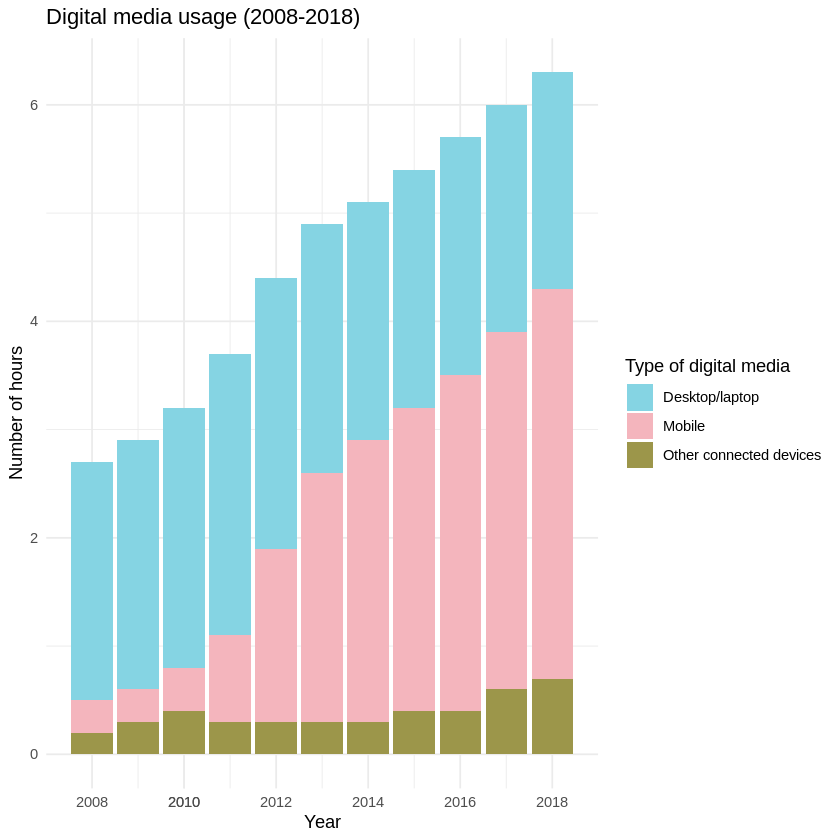

In [125]:
# Bar graph of hours spent on digital media

# Grouping variables to be able to show a stacked bar chart

stackeddigitalmedia <- pivot_longer(socialmediahours, cols = c("HoursMobile","HoursDesktoplaptop","HoursOtherconnecteddevices"), names_to = "Socialhours", values_to = "Count")

# Plotting graph
stackeddigitalmedia %>%
  ggplot(aes(x=Year, y = Count, fill = Socialhours)) +
  geom_bar(position = "stack", stat = "identity") +
  labs(title = "Digital media usage (2008-2018)", x = "Year", y = "Number of hours", fill= "Type of digital media") +
  scale_x_continuous(breaks = c(2008, 2010, 2010, 2012, 2014, 2016, 2018)) +
  scale_fill_manual(values = wes_palette(n=3,name="Moonrise3"),
                    labels = c("Desktop/laptop", "Mobile", "Other connected devices")) +
  theme_minimal()

In [126]:
# Multiplication of hours spent on social media by the proportion of households using social media

# maybe would require the matching between the two datasets to be done here


# 3. Regression analysis


## 3.1. Matching datasets & installing regression package

In [127]:
# ignore: IM WORKING ON THIS ABOVE - Before matching the datasets we need to be able to add new rows that compute proportions (prop of people identifying as extreme, prop of people extreme or near extreme)

dfpolarizationfinal
df_techusage

Spectrum,Label,1974,1975,1976,1977,1978,1980,1982,1983,⋯,2004,2006,2008,2010,2012,2014,2016,2018,2021,2022
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.0000000,Extremely liberal,2.200000e+01,4.600000e+01,31.0000000,3.700000e+01,2.200000e+01,3.600000e+01,4.800000e+01,16.00000000,⋯,4.600000e+01,1.390000e+02,6.900000e+01,7.600000e+01,8.100000e+01,9.400000e+01,1.360000e+02,1.220000e+02,2.070000e+02,192.0000000
2.0000000,Liberal,2.010000e+02,1.790000e+02,187.0000000,1.690000e+02,1.420000e+02,1.210000e+02,1.990000e+02,67.00000000,⋯,1.200000e+02,5.240000e+02,2.400000e+02,2.590000e+02,2.440000e+02,3.040000e+02,3.500000e+02,2.780000e+02,6.230000e+02,486.0000000
3.0000000,Slightly liberal,2.070000e+02,1.960000e+02,186.0000000,2.140000e+02,2.410000e+02,2.080000e+02,2.670000e+02,98.00000000,⋯,1.530000e+02,5.170000e+02,2.210000e+02,2.320000e+02,2.080000e+02,2.630000e+02,3.100000e+02,2.560000e+02,4.900000e+02,400.0000000
4.0000000,"Moderate, middle of the road",5.640000e+02,5.590000e+02,559.0000000,5.640000e+02,5.490000e+02,5.820000e+02,6.940000e+02,319.00000000,⋯,4.970000e+02,1.683000e+03,7.400000e+02,7.460000e+02,7.130000e+02,9.890000e+02,1.032000e+03,8.550000e+02,1.377000e+03,1245.0000000
5.0000000,Slightly conservative,2.210000e+02,2.320000e+02,221.0000000,2.510000e+02,2.630000e+02,2.580000e+02,2.350000e+02,142.00000000,⋯,2.140000e+02,6.180000e+02,2.680000e+02,2.650000e+02,2.680000e+02,3.340000e+02,3.820000e+02,2.830000e+02,4.760000e+02,430.0000000
6.0000000,Conservative,1.600000e+02,1.500000e+02,190.0000000,1.790000e+02,1.880000e+02,1.800000e+02,2.290000e+02,108.00000000,⋯,2.230000e+02,6.850000e+02,3.270000e+02,3.150000e+02,2.920000e+02,3.580000e+02,4.260000e+02,3.540000e+02,6.170000e+02,514.0000000
7.0000000,Extremely conservative,3.500000e+01,3.500000e+01,27.0000000,3.900000e+01,3.000000e+01,4.400000e+01,6.700000e+01,20.00000000,⋯,5.600000e+01,1.670000e+02,6.800000e+01,8.000000e+01,6.800000e+01,1.070000e+02,1.200000e+02,9.900000e+01,1.740000e+02,159.0000000
28.0000000,Total,1.410000e+03,1.397000e+03,1401.0000000,1.453000e+03,1.435000e+03,1.429000e+03,1.739000e+03,770.00000000,⋯,1.309000e+03,4.333000e+03,1.933000e+03,1.973000e+03,1.874000e+03,2.449000e+03,2.756000e+03,2.247000e+03,3.964000e+03,3426.0000000
0.2857143,propextr,4.042553e-02,5.798139e-02,0.0413990,5.230557e-02,3.623693e-02,5.598321e-02,6.612996e-02,0.04675325,⋯,7.792208e-02,7.062082e-02,7.087429e-02,7.906741e-02,7.950907e-02,8.207432e-02,9.288824e-02,9.835336e-02,9.611504e-02,0.1024518


Entity,Code,Year,Usage
<chr>,<lgl>,<int>,<dbl>
Social media usage,NA,2005,5
Social media usage,NA,2006,11
Social media usage,NA,2007,15
Social media usage,NA,2008,21
Social media usage,NA,2009,37
Social media usage,NA,2010,48
Social media usage,NA,2011,50
Social media usage,NA,2012,59
Social media usage,NA,2013,63


In [128]:
# Filtering the datasets to match columns

df_techusagewider <- pivot_wider(df_techusage, names_from = Year, values_from = Usage)
df_techusagewider <- df_techusagewider %>%
  select (-"Code") %>%
  rename("Label" = "Entity")
df_techusagewider

Label,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Social media usage,5,11,15,21,37,48,50,59,63,62,65,69,80,77,79


@ Yussuf. Joining datasets together below. For now only doing polarization and social media usage, but ideally we'd want to also add social media hours.
We only have a match on years that are even (thats the data we have in the polarization dataset), even though there are more years in the social media dataset. Ideally we'd find to include the additional datapoints from the social media dataset in one way or another.

In [129]:
# Joining datasets together using rbind

combined_df <- bind_rows(dfpolarizationfinal,df_techusagewider)

# Showing a filtered dataset only with columns that match

combined_dftest <- combined_df %>%
  select(where(~ all(complete.cases(.))))

combined_dftest

Label,2006,2008,2010,2012,2014,2016,2018
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Extremely liberal,1.390000e+02,6.900000e+01,7.600000e+01,8.100000e+01,9.400000e+01,1.360000e+02,1.220000e+02
Liberal,5.240000e+02,2.400000e+02,2.590000e+02,2.440000e+02,3.040000e+02,3.500000e+02,2.780000e+02
Slightly liberal,5.170000e+02,2.210000e+02,2.320000e+02,2.080000e+02,2.630000e+02,3.100000e+02,2.560000e+02
"Moderate, middle of the road",1.683000e+03,7.400000e+02,7.460000e+02,7.130000e+02,9.890000e+02,1.032000e+03,8.550000e+02
Slightly conservative,6.180000e+02,2.680000e+02,2.650000e+02,2.680000e+02,3.340000e+02,3.820000e+02,2.830000e+02
Conservative,6.850000e+02,3.270000e+02,3.150000e+02,2.920000e+02,3.580000e+02,4.260000e+02,3.540000e+02
Extremely conservative,1.670000e+02,6.800000e+01,8.000000e+01,6.800000e+01,1.070000e+02,1.200000e+02,9.900000e+01
Total,4.333000e+03,1.933000e+03,1.973000e+03,1.874000e+03,2.449000e+03,2.756000e+03,2.247000e+03
propextr,7.062082e-02,7.087429e-02,7.906741e-02,7.950907e-02,8.207432e-02,9.288824e-02,9.835336e-02


In [130]:
# installing the package for a simple logistic regression if not already included in ggplot & stuff (we can check later if there are other regressions we can run)



## 3.2. Linear regression on extreme polarization

In [131]:
# running a simple regression (the basic format is that you have a variable Y (for us its polarization) which is impacted by variables in X (for now we focus on one, which is social media use))
# the format for the formula is usually smth like regression(y~x)
# the clearest form of output is a graphic of the points (x on x axis, y on y axis), which also typically has a correlation coefficient associated to it, and an R^2 (the equivalent of standard error for regressions)


# transposing since necessary for regression
combined_dftest2 <- t(combined_dftest)
# converting to dataframe
combined_dftest2 <- as.data.frame(combined_dftest2,stringsAsFactors = FALSE)
# changing the title of the columns to the first row
colnames(combined_dftest2) <- combined_dftest2[1, ]
combined_dftest2 <- combined_dftest2[-1, ]
# changing data type to numeric since necessary for regression
combined_dftest2 <- combined_dftest2 %>%
  mutate(across(everything(), ~as.numeric(as.character(.))))
# changing the name of the social media column since causing problems in the regression
colnames(combined_dftest2)[colnames(combined_dftest2) == "Social media usage"] <- "SocialMediaUsage"
combined_dftest2

# Graph of social media usage vs proportion of extreme
ggplot(combined_dftest2, aes(x = `Social media usage`, y = propextr)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(x = "Social Media Usage", y = "PropExtr", title = "Linear Regression")


# running linear regression
model <- lm(propextr ~ SocialMediaUsage, data = combined_dftest2)
summary(model)




,Extremely liberal,Liberal,Slightly liberal,"Moderate, middle of the road",Slightly conservative,Conservative,Extremely conservative,Total,propextr,propnearextr,SocialMediaUsage
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2006,139,524,517,1683,618,685,167,4333,0.07062082,0.3496423,11
2008,69,240,221,740,268,327,68,1933,0.07087429,0.3642007,21
2010,76,259,232,746,265,315,80,1973,0.07906741,0.3699949,48
2012,81,244,208,713,268,292,68,1874,0.07950907,0.3655283,59
2014,94,304,263,989,334,358,107,2449,0.08207432,0.3523887,62
2016,136,350,310,1032,382,426,120,2756,0.09288824,0.3744557,69
2018,122,278,256,855,283,354,99,2247,0.09835336,0.3796173,77


ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'Social media usage' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = e


Call:
lm(formula = propextr ~ SocialMediaUsage, data = combined_dftest2)

Residuals:
      2006       2008       2010       2012       2014       2016       2018 
 0.0033721 -0.0001761 -0.0022477 -0.0059879 -0.0045632  0.0035895  0.0060133 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      6.307e-02  4.451e-03  14.170 3.15e-05 ***
SocialMediaUsage 3.802e-04  8.149e-05   4.665  0.00551 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.004943 on 5 degrees of freedom
Multiple R-squared:  0.8132,	Adjusted R-squared:  0.7758 
F-statistic: 21.77 on 1 and 5 DF,  p-value: 0.005506


## 3.3. Linear regression on extreme + near-extreme polarization

# Trash
Old pieces of code to remove before submitting

In [133]:
# OBSOLETE APPROACH TO ADDING ROWS IN THE POLARIZATION DATA, WAY TOO COMPLEX

# More detailed version, which computes the difference in proportions for each - this is the part that we'd be able to do by adding rows to the full dataset

diffprop <- cleaned_data

#nsurveyedperyear <- colSums(diffprop[,3:30])
#nsurveyedperyear

# diffprop %>%
#   bind_rows(summarise(., across(where(is.numeric), sum), across(where(is.character), ~'Total')))
#   #bind_rows(summarise(., across(Label="Extremely liberal"|Label =="Extremely conservative",sum), across(where(is.character),~'propextrliberal')))

dfpolarizationfinal <- diffprop %>%
  bind_rows(summarise(., across(where(is.numeric), sum), across(where(is.character), ~'Total')))
dfpolarizationfinal

diffpropextr <- diffprop %>%
  filter(Label == "Extremely liberal" | Label == "Extremely conservative") %>%
  bind_rows(summarise(., across(where(is.numeric), sum), across(where(is.character), ~'propextr'))) %>%
  filter(Label =="propextr")
diffpropextr

diffpropnearextr <- diffprop %>%
  filter(Label == "Extremely liberal" | Label == "Extremely conservative" | Label == "Liberal" | Label == "Conservative") %>%
  bind_rows(summarise(., across(where(is.numeric), sum), across(where(is.character), ~'propnearextr'))) %>%
  filter(Label =="propnearextr")
diffpropnearextr


diffpropcombined <- rbind(dfpolarizationfinal,diffpropextr,diffpropnearextr)
diffpropcombined

# Calculate the proportion of the total population for

diffpropcombined[9,-2] <- diffpropcombined[9,-2] / diffpropcombined[8,-2]
diffpropcombined


# rowpropextrlib <- diffprop[1,]
# rowpropextrlib
# rowpropextrcons <- diffprop[6,]
# rowpropextrcons
# rowpropextrsum <- rowpropextrcons + rowpropextrlib
# rowpropextrsum




Spectrum,Label,1974,1975,1976,1977,1978,1980,1982,1983,⋯,2004,2006,2008,2010,2012,2014,2016,2018,2021,2022
<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Extremely liberal,22,46,31,37,22,36,48,16,⋯,46,139,69,76,81,94,136,122,207,192
2,Liberal,201,179,187,169,142,121,199,67,⋯,120,524,240,259,244,304,350,278,623,486
3,Slightly liberal,207,196,186,214,241,208,267,98,⋯,153,517,221,232,208,263,310,256,490,400
4,"Moderate, middle of the road",564,559,559,564,549,582,694,319,⋯,497,1683,740,746,713,989,1032,855,1377,1245
5,Slightly conservative,221,232,221,251,263,258,235,142,⋯,214,618,268,265,268,334,382,283,476,430
6,Conservative,160,150,190,179,188,180,229,108,⋯,223,685,327,315,292,358,426,354,617,514
7,Extremely conservative,35,35,27,39,30,44,67,20,⋯,56,167,68,80,68,107,120,99,174,159
28,Total,1410,1397,1401,1453,1435,1429,1739,770,⋯,1309,4333,1933,1973,1874,2449,2756,2247,3964,3426


Spectrum,Label,1974,1975,1976,1977,1978,1980,1982,1983,⋯,2004,2006,2008,2010,2012,2014,2016,2018,2021,2022
<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
8,propextr,57,81,58,76,52,80,115,36,⋯,102,306,137,156,149,201,256,221,381,351


Spectrum,Label,1974,1975,1976,1977,1978,1980,1982,1983,⋯,2004,2006,2008,2010,2012,2014,2016,2018,2021,2022
<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
16,propnearextr,418,410,435,424,382,381,543,211,⋯,445,1515,704,730,685,863,1032,853,1621,1351


Spectrum,Label,1974,1975,1976,1977,1978,1980,1982,1983,⋯,2004,2006,2008,2010,2012,2014,2016,2018,2021,2022
<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Extremely liberal,22,46,31,37,22,36,48,16,⋯,46,139,69,76,81,94,136,122,207,192
2,Liberal,201,179,187,169,142,121,199,67,⋯,120,524,240,259,244,304,350,278,623,486
3,Slightly liberal,207,196,186,214,241,208,267,98,⋯,153,517,221,232,208,263,310,256,490,400
4,"Moderate, middle of the road",564,559,559,564,549,582,694,319,⋯,497,1683,740,746,713,989,1032,855,1377,1245
5,Slightly conservative,221,232,221,251,263,258,235,142,⋯,214,618,268,265,268,334,382,283,476,430
6,Conservative,160,150,190,179,188,180,229,108,⋯,223,685,327,315,292,358,426,354,617,514
7,Extremely conservative,35,35,27,39,30,44,67,20,⋯,56,167,68,80,68,107,120,99,174,159
28,Total,1410,1397,1401,1453,1435,1429,1739,770,⋯,1309,4333,1933,1973,1874,2449,2756,2247,3964,3426
8,propextr,57,81,58,76,52,80,115,36,⋯,102,306,137,156,149,201,256,221,381,351


Spectrum,Label,1974,1975,1976,1977,1978,1980,1982,1983,⋯,2004,2006,2008,2010,2012,2014,2016,2018,2021,2022
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.0000000,Extremely liberal,2.200000e+01,4.600000e+01,3.1000e+01,3.700000e+01,2.200000e+01,3.600000e+01,4.800000e+01,16.00000000,⋯,4.600000e+01,1.390000e+02,6.900000e+01,7.600000e+01,8.100000e+01,9.400000e+01,1.360000e+02,1.220000e+02,2.070000e+02,192.0000000
2.0000000,Liberal,2.010000e+02,1.790000e+02,1.8700e+02,1.690000e+02,1.420000e+02,1.210000e+02,1.990000e+02,67.00000000,⋯,1.200000e+02,5.240000e+02,2.400000e+02,2.590000e+02,2.440000e+02,3.040000e+02,3.500000e+02,2.780000e+02,6.230000e+02,486.0000000
3.0000000,Slightly liberal,2.070000e+02,1.960000e+02,1.8600e+02,2.140000e+02,2.410000e+02,2.080000e+02,2.670000e+02,98.00000000,⋯,1.530000e+02,5.170000e+02,2.210000e+02,2.320000e+02,2.080000e+02,2.630000e+02,3.100000e+02,2.560000e+02,4.900000e+02,400.0000000
4.0000000,"Moderate, middle of the road",5.640000e+02,5.590000e+02,5.5900e+02,5.640000e+02,5.490000e+02,5.820000e+02,6.940000e+02,319.00000000,⋯,4.970000e+02,1.683000e+03,7.400000e+02,7.460000e+02,7.130000e+02,9.890000e+02,1.032000e+03,8.550000e+02,1.377000e+03,1245.0000000
5.0000000,Slightly conservative,2.210000e+02,2.320000e+02,2.2100e+02,2.510000e+02,2.630000e+02,2.580000e+02,2.350000e+02,142.00000000,⋯,2.140000e+02,6.180000e+02,2.680000e+02,2.650000e+02,2.680000e+02,3.340000e+02,3.820000e+02,2.830000e+02,4.760000e+02,430.0000000
6.0000000,Conservative,1.600000e+02,1.500000e+02,1.9000e+02,1.790000e+02,1.880000e+02,1.800000e+02,2.290000e+02,108.00000000,⋯,2.230000e+02,6.850000e+02,3.270000e+02,3.150000e+02,2.920000e+02,3.580000e+02,4.260000e+02,3.540000e+02,6.170000e+02,514.0000000
7.0000000,Extremely conservative,3.500000e+01,3.500000e+01,2.7000e+01,3.900000e+01,3.000000e+01,4.400000e+01,6.700000e+01,20.00000000,⋯,5.600000e+01,1.670000e+02,6.800000e+01,8.000000e+01,6.800000e+01,1.070000e+02,1.200000e+02,9.900000e+01,1.740000e+02,159.0000000
28.0000000,Total,1.410000e+03,1.397000e+03,1.4010e+03,1.453000e+03,1.435000e+03,1.429000e+03,1.739000e+03,770.00000000,⋯,1.309000e+03,4.333000e+03,1.933000e+03,1.973000e+03,1.874000e+03,2.449000e+03,2.756000e+03,2.247000e+03,3.964000e+03,3426.0000000
0.2857143,propextr,4.042553e-02,5.798139e-02,4.1399e-02,5.230557e-02,3.623693e-02,5.598321e-02,6.612996e-02,0.04675325,⋯,7.792208e-02,7.062082e-02,7.087429e-02,7.906741e-02,7.950907e-02,8.207432e-02,9.288824e-02,9.835336e-02,9.611504e-02,0.1024518


In [134]:
# Trying line graph from scratch

pivot_longer

dfpolarizationfinal %>%
  ggplot(aes(x = Year, y = Usage)) +
  geom_line() +
    labs(title = "Social media usage, 2005 - 2019") +
    scale_y_continuous(breaks = c(0,10,20,30,40,50,60,70,80,90,100)) +
      scale_x_continuous(breaks = c(2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019)) +
      theme_bw()


function (data, cols, ..., cols_vary = "fastest", names_to = "name", 
    names_prefix = NULL, names_sep = NULL, names_pattern = NULL, 
    names_ptypes = NULL, names_transform = NULL, names_repair = "check_unique", 
    values_to = "value", values_drop_na = FALSE, values_ptypes = NULL, 
    values_transform = NULL) 
{
    check_dots_used()
    UseMethod("pivot_longer")
}
<bytecode: 0x59cf6f48dab0>
<environment: namespace:tidyr>

ERROR while rich displaying an object: Error in `geom_line()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'Year' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6

In [135]:
# We can now Re-do this in a cleaner fashion, and for every single year, based on the new rows I created in the line graph approach above

# Simple version, comparing 2022 to 1974
# Ideally we would be able to add rows that sum over all columns and add specific rows (extremely conservative, extremely liberal). In practice I haven't found a way to do this yet

# diffprop <- cleaned_data %>%
#   summarise(across(where(is.numeric), sum, na.rm = TRUE),
#             across(where(is.character), ~'Total')) %>%
#   bind_rows()


n1974extr <- dfpolarizationfinal %>%
  filter(Label == "propextr" | Label == "propnearextr" | Label == "Total") %>%
  select('Label','1974','2006','2018','2022')

print(n1974extr)


  Label 1974 2006 2018 2022
1 Total 1410 4333 2247 3426
